Data is provided from: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

# Phase 1

Data loading.

In [77]:
#Importig needed modules.

from pandas import read_csv , concat , DataFrame
from matplotlib.pyplot import pie  , title , show , legend , xlabel , ylabel , plot
from random import sample
from pickle import dump
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense
from tensorflow.keras.models import Sequential

#Instancing from Tokenizer object.

tokenizer = Tokenizer(oov_token='<00U00>')

In [78]:
#Loading csv files and converting them to Pandas dataframes.

path_fake = "D:\\datasets\\Fake_and_True_news\\Fake.csv"
path_true = "D:\\datasets\\Fake_and_True_news\\True.csv"
file_fake = read_csv(path_fake)
file_true = read_csv(path_true)
dff = file_fake.copy()
dft = file_true.copy()
dff.sample(10)

,title,text,subject,date
6868,These DISGUSTING Trump T-shirts Are EXACTLY W...,Trump s supporters have proven time and time a...,News,"April 16, 2016"
15417,(Video) Judge Jeanine: You Can’t Trust Hillary...,"Once again, a great opening statement from Jud...",politics,"Jul 26, 2015"
17435,FIGHTING BACK: [VIDEO] Ben Carson’s Brilliance...,It s so refreshing to see these GOP candidates...,Government News,"Apr 11, 2015"
19820,LEAKED EMAIL: Hillary’s Team Caught Bashing “B...,"As a Catholic, I m not sure what offends me mo...",left-news,"Oct 11, 2016"
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...
2500,WATCH: CNN Host Fareed Zakaria ROASTS Trump F...,Donald Trump embarrassed himself and the natio...,News,"February 16, 2017"
22947,"BEYOND MISSION CREEP: U.S. Planning to Send 1,...",Patrick Henningsen 21st Century WireJust as 2...,Middle-east,"March 17, 2017"
1343,Donald Trump Was Tweeting Again Last Night; H...,"Donald Trump was away for a bit over a week, w...",News,"May 28, 2017"
15196,BREAKING: Rubio Top Official Punches Snarky Ra...,The fun s already begun at the Republican Lead...,politics,"Sep 18, 2015"
10134,ICELAND PROUDLY CLAIMS TO HAVE “ERADICATED” Do...,Mainstream news channels rarely draw attention...,politics,"Aug 16, 2017"


In [79]:
#Inserting label column.

dff = concat([dff,DataFrame([0 for i in range(len(dff))],columns=['Label'])],axis=1)

In [80]:
#Fake-news data frame information.

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   Label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [81]:
dff.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [82]:
#True-news data frame information.

dft.sample(10)

,title,text,subject,date
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
6994,"Factbox: Contenders, picks for key jobs in Tru...",(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"November 30, 2016"
1853,"Trump, his party: an American odd couple",WASHINGTON (Reuters) - When President Donald T...,politicsNews,"September 6, 2017"
12210,"Brazil's Temer to leave hospital, return to Br...",BRASILIA (Reuters) - Brazilian President Miche...,worldnews,"December 15, 2017"
14926,"Zimbabwe's top general ready ""to step in"" to e...",HARARE (Reuters) - Zimbabwe s top general warn...,worldnews,"November 13, 2017"
4467,Key House Republican says progress seen on hea...,WASHINGTON (Reuters) - U.S. Representative Mar...,politicsNews,"April 5, 2017"
10025,Democrats force postponement of committee's vo...,WASHINGTON (Reuters) - The U.S. Senate Banking...,politicsNews,"April 7, 2016"
10624,Michigan governor's aides urged switch away fr...,DETROIT (Reuters) - Quality problems prompted ...,politicsNews,"February 26, 2016"
2323,Russia: Pence Balkans comments expose Washingt...,MOSCOW (Reuters) - Accusations made by U.S. Vi...,politicsNews,"August 3, 2017"
7442,"For China, Trump win creates uncertainty, oppo...",BEIJING (Reuters) - Donald Trump’s upset elect...,politicsNews,"November 9, 2016"


In [83]:
#Inserting label column.

dft = concat([dft,DataFrame([1 for i in range(len(dft))],columns=['Label'])],axis=1)

In [84]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   Label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [85]:
dft.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [86]:
#Making an unique data frame and shuffling them.

df = concat([dff,dft],axis=0).to_numpy().tolist()
df = sample(df,len(df))
df = DataFrame(df,columns=dff.columns)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


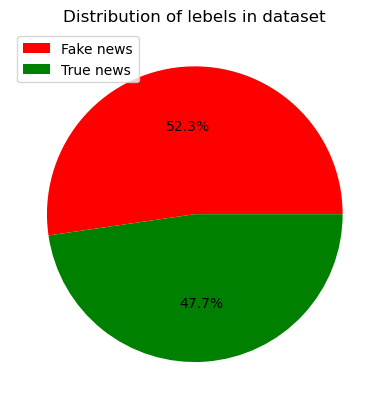

In [88]:
pie([df.Label.value_counts().values[0],
     df.Label.value_counts().values[1]],
    autopct='%1.1f%%',
    colors=['red','green'])
legend(['Fake news','True news'])
title('Distribution of lebels in dataset')
show()

# Phase 2

Data preprocessing.

In [89]:
#Creating a function in order to remove stop words from each text.

def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [90]:
#Removing stop words from texts.

features = [Filter(note) for note in df.text]

#Splitting labels from features.

lbl = df.Label.to_numpy()

#Tokenizing progress.

tokenizer.fit_on_texts(features)

#Making tikenized texts into sequences.

seqs = tokenizer.texts_to_sequences(features)

#Padding sequences.

matrix = pad_sequences(seqs,padding='post',truncating='post',maxlen=16)

In [91]:
#Saving the tokenizer object in the main directory. 

with open('D:\\datasets\\Fake_and_True_news\\Tokenizer.pkl','wb') as file:
    dump(tokenizer,file)

In [92]:
#Splitting data to train and test sets.
#80% percent of data are considered as train set.

size = int(input('Enter train size:'))
idx = (size*len(matrix))//100
idx_val = ((((100-size)//2)+size)*len(matrix))//100

#Making train set.

xtr , ytr = matrix[:idx] , lbl[:idx]

#Making validation set.

xval , yval = matrix[idx:idx_val] , lbl[idx:idx_val]

#Making test set.

xts , yts = matrix[idx_val:] , lbl[idx_val:]

Enter train size:80


In [93]:
print(f'Train size: {len(xtr)} - {size}%\nValidation size: {len(xval)} - {(100-size)//2}%\nTest size: {len(xts)} - {(100-size)//2}%')

Train size: 35918 - 80%
Validation size: 4490 - 10%
Test size: 4490 - 10%


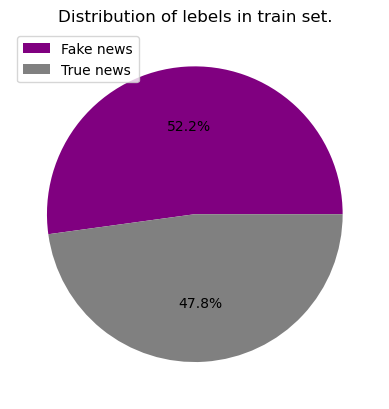

In [94]:
pie([ytr.tolist().count(0),
     ytr.tolist().count(1)],
    autopct='%1.1f%%',
    colors=['purple','gray'])
legend(['Fake news','True news'])
title('Distribution of lebels in train set.')
show()

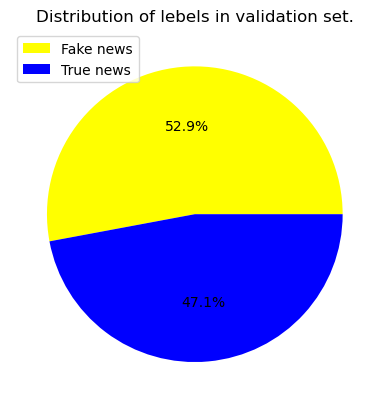

In [95]:
pie([yval.tolist().count(0),
     yval.tolist().count(1)],
    autopct='%1.1f%%',
    colors=['yellow','blue'])
legend(['Fake news','True news'])
title('Distribution of lebels in validation set.')
show()

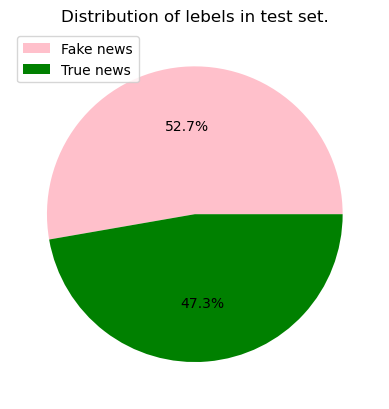

In [96]:
pie([yts.tolist().count(0),
     yts.tolist().count(1)],
    autopct='%1.1f%%',
    colors=['pink','green'])
legend(['Fake news','True news'])
title('Distribution of lebels in test set.')
show()

# Phase 3

Modeling and training

In [97]:
#Defining a sequential model.

model = Sequential([Embedding(len(tokenizer.word_index),2,input_length=16),
                    GlobalAveragePooling1D(),
                    Dense(1,activation='sigmoid')])

#Compiling the model.

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
#Data train.

history = model.fit(xtr,ytr,epochs=15,validation_data=(xval,yval))

Epoch 1/15
1123/1123 [==============================] - 5s 3ms/step - loss: 0.5509 - accuracy: 0.9497 - val_loss: 0.3911 - val_accuracy: 0.9722
Epoch 2/15
1123/1123 [==============================] - 3s 3ms/step - loss: 0.2687 - accuracy: 0.9752 - val_loss: 0.1727 - val_accuracy: 0.9804
Epoch 3/15
1123/1123 [==============================] - 3s 3ms/step - loss: 0.1205 - accuracy: 0.9832 - val_loss: 0.0843 - val_accuracy: 0.9878
Epoch 4/15
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0610 - accuracy: 0.9891 - val_loss: 0.0485 - val_accuracy: 0.9913
Epoch 5/15
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0346 - accuracy: 0.9926 - val_loss: 0.0321 - val_accuracy: 0.9931
Epoch 6/15
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0216 - accuracy: 0.9950 - val_loss: 0.0241 - val_accuracy: 0.9947
Epoch 7/15
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0147 - accuracy: 0.9962 - val_loss: 0.0200 - val_accuracy:

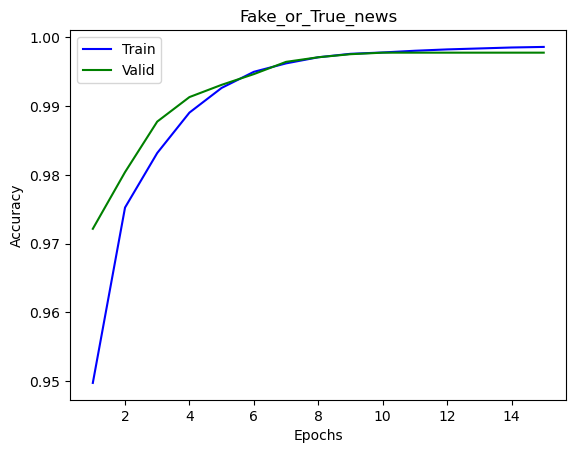

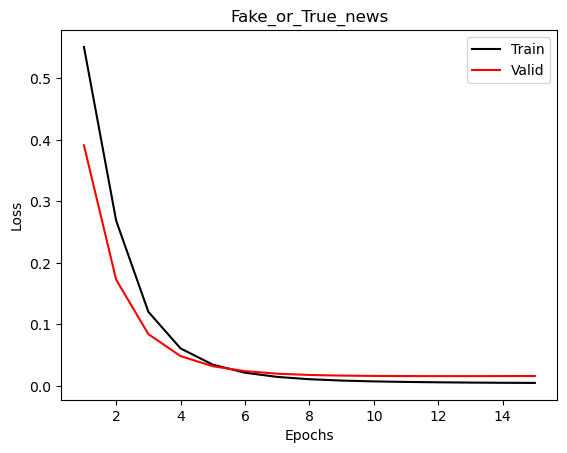

In [99]:
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['accuracy'],'blue')
plot(epoch,results['val_accuracy'],'green')
xlabel('Epochs')
ylabel('Accuracy')
title('Fake_or_True_news')
legend(['Train','Valid'])
show()
plot(epoch,results['loss'],'black')
plot(epoch,results['val_loss'],'red')
xlabel('Epochs')
ylabel('Loss')
title('Fake_or_True_news')
legend(['Train','Valid'])
show()

In [100]:
#Evaluating on test set.

evl = model.evaluate(xts,yts)

print(f'\nLoss on test set: {evl[0]}\n\nAcuuracy on test set: {evl[1]*100:0.2f}%')

141/141 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9987

Loss on test set: 0.0039833723567426205

Acuuracy on test set: 99.87%


In [101]:
#Saving the model in the main directory.

model.save('D:\\datasets\\Fake_and_True_news\\model')

INFO:tensorflow:Assets written to: D:\datasets\Fake_and_True_news\model\assets


INFO:tensorflow:Assets written to: D:\datasets\Fake_and_True_news\model\assets


# End